In [1]:
from sklearn.datasets import load_diabetes

In [2]:
data = load_diabetes(as_frame=True, scaled=False)

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
X = data['data']
y = data['target']
df = data['frame']

In [6]:
X.shape, y.shape

((442, 10), (442,))

In [7]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [8]:
!pip install dataprep

^C


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [10]:
model = LinearRegression()
poly = PolynomialFeatures(degree=2, include_bias=False)

In [11]:
X_aug = poly.fit_transform(X)
model.fit(X_aug, y)


LinearRegression()

In [12]:
y_pred = model.predict(X_aug)

In [13]:
print(f'{model.intercept_:.2f}')
for name, value in zip(data['feature_names'], model.coef_):
    print(f'{name}: {value:.2f}')


3572.32
age: -10.50
sex: -11.46
bmi: -20.87
bp: 4.18
s1: 34.87
s2: -27.09
s3: -49.60
s4: -193.82
s5: -1368.40
s6: -9.95


In [14]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y, y_pred)

np.float64(49.16077966526738)

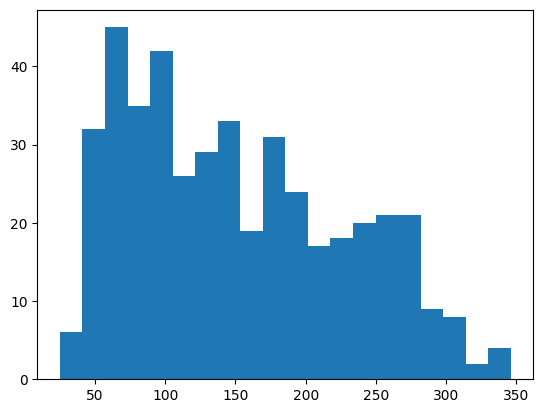

In [15]:
import matplotlib.pyplot as plt

plt.hist(y, bins=20)
plt.show()

In [16]:
import numpy as np

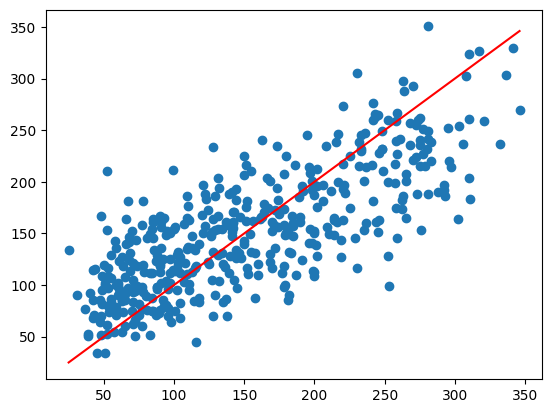

In [17]:
x_aux = np.linspace(y.min(), y.max(), 100)
y_aux = x_aux
plt.figure()
plt.scatter(y, y_pred)
plt.plot(x_aux, y_aux, color='red')
plt.show()